# Using Necessary libraries




In [91]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the dataset

In [66]:
file_path = "/content/WASSA23_essay_level_with_labels_train.csv"
df = pd.read_csv(file_path)

# Overview of the dataset

In [101]:
df.head(5)

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion,text_length,cleaned_essay,emotion_label
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,2.0,3.429,5.0,1,train,1,Hope/Sadness,87,breaks heart see people living conditions hope...,0
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,2.857,2.857,2.714,1,train,2,Anger,63,wonder people trying help people understand ha...,1
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,2.0715,4.143,4.643,1,train,4,Sadness,69,reading article help feel really sad terrible ...,1
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,4.143,4.857,5.0,1,train,5,Sadness,67,sad someone amazing story died freak accident ...,1
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,2.0,3.429,5.0,1,train,7,Neutral,62,reading article looks like world lost kindhear...,1


# Remove the null values

In [68]:
print(df.isnull().sum())


conversation_id                  0
article_id                       0
essay                            0
empathy                          0
distress                         0
speaker_id                       0
gender                           0
education                        0
race                             0
age                              0
income                           0
personality_conscientiousness    0
personality_openess              0
personality_extraversion         0
personality_agreeableness        0
personality_stability            0
iri_perspective_taking           0
iri_personal_distress            0
iri_fantasy                      0
iri_empathatic_concern           0
speaker_number                   0
split                            0
essay_id                         0
emotion                          0
dtype: int64


# Print the first few rows after cleaning

In [99]:
df = df.replace("unknown", None).dropna().reset_index(drop=True)


df.head(5)


,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion,text_length,cleaned_essay,emotion_label
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,2.0,3.429,5.0,1,train,1,Hope/Sadness,87,breaks heart see people living conditions hope...,0
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,2.857,2.857,2.714,1,train,2,Anger,63,wonder people trying help people understand ha...,1
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,2.0715,4.143,4.643,1,train,4,Sadness,69,reading article help feel really sad terrible ...,1
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,4.143,4.857,5.0,1,train,5,Sadness,67,sad someone amazing story died freak accident ...,1
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,2.0,3.429,5.0,1,train,7,Neutral,62,reading article looks like world lost kindhear...,1


# Summary of dataset

In [70]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   conversation_id                779 non-null    int64  
 1   article_id                     779 non-null    int64  
 2   essay                          779 non-null    object 
 3   empathy                        779 non-null    float64
 4   distress                       779 non-null    float64
 5   speaker_id                     779 non-null    int64  
 6   gender                         779 non-null    object 
 7   education                      779 non-null    object 
 8   race                           779 non-null    object 
 9   age                            779 non-null    object 
 10  income                         779 non-null    object 
 11  personality_conscientiousness  779 non-null    object 
 12  personality_openess            779 non-null    obj

# Count unique values in categorical columns

In [71]:
print(df.nunique())

conversation_id                  396
article_id                       100
essay                            779
empathy                           37
distress                          49
speaker_id                        57
gender                             2
education                          6
race                               5
age                               26
income                            41
personality_conscientiousness     11
personality_openess               13
personality_extraversion          16
personality_agreeableness         12
personality_stability             14
iri_perspective_taking            22
iri_personal_distress             25
iri_fantasy                       25
iri_empathatic_concern            25
speaker_number                     2
split                              1
essay_id                         779
emotion                           30
dtype: int64


# Display statistical summary

In [72]:
df.describe()


,conversation_id,article_id,empathy,distress,speaker_id,speaker_number,essay_id
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,257.210526,188.175866,4.208601,3.750642,28.992298,1.499358,505.889602
std,140.954274,125.558244,2.006974,2.041159,15.147601,0.500321,287.339790
min,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,140.000000,71.000000,2.250000,1.750000,19.000000,1.000000,258.500000
50%,259.000000,171.000000,4.500000,3.875000,25.000000,1.000000,499.000000
75%,375.000000,301.000000,6.000000,6.000000,44.000000,2.000000,757.500000
max,500.000000,417.000000,7.000000,7.000000,58.000000,2.000000,999.000000


#Top 10 Most Frequent Emotions in Dataset

<ipython-input-73-47a7413b43a3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_emotions.index, y=top_10_emotions.values, palette="viridis")


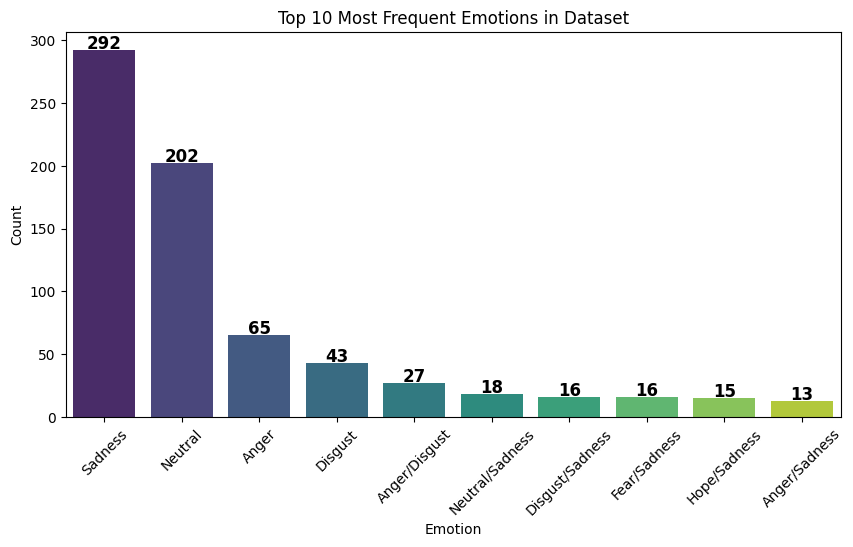

In [73]:
emotion_counts = df["emotion"].value_counts()


top_10_emotions = emotion_counts.nlargest(10)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_10_emotions.index, y=top_10_emotions.values, palette="viridis")


for i, value in enumerate(top_10_emotions.values):
    ax.text(i, value + 1, str(value), ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent Emotions in Dataset")
plt.show()

#Distribution of Essay Lengths

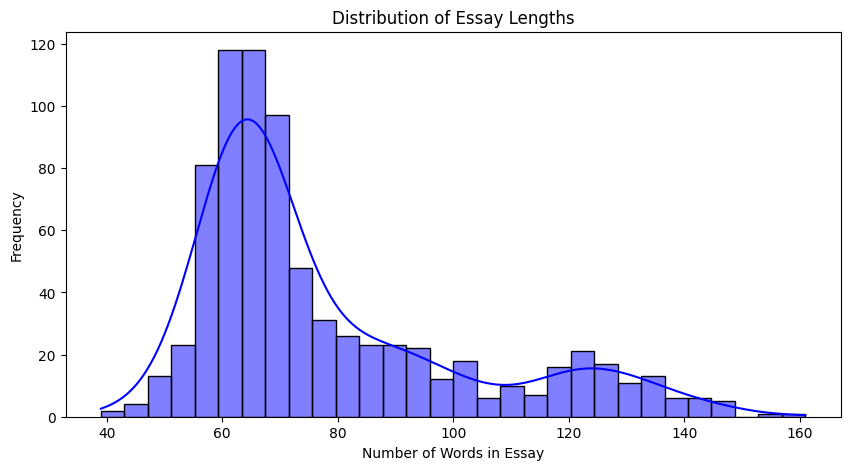

In [74]:
df["text_length"] = df["essay"].apply(lambda x: len(str(x).split()))


plt.figure(figsize=(10, 5))
sns.histplot(df["text_length"], bins=30, kde=True, color='blue')
plt.xlabel("Number of Words in Essay")
plt.ylabel("Frequency")
plt.title("Distribution of Essay Lengths")
plt.show()


# Wordcloud

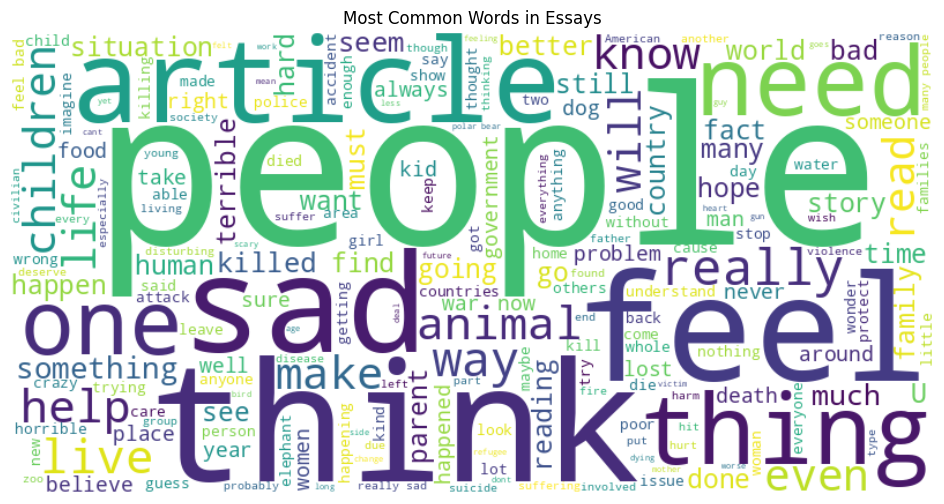

In [75]:
all_text = " ".join(df["essay"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Essays")
plt.show()


# Correlation Matrix of Numeric Features

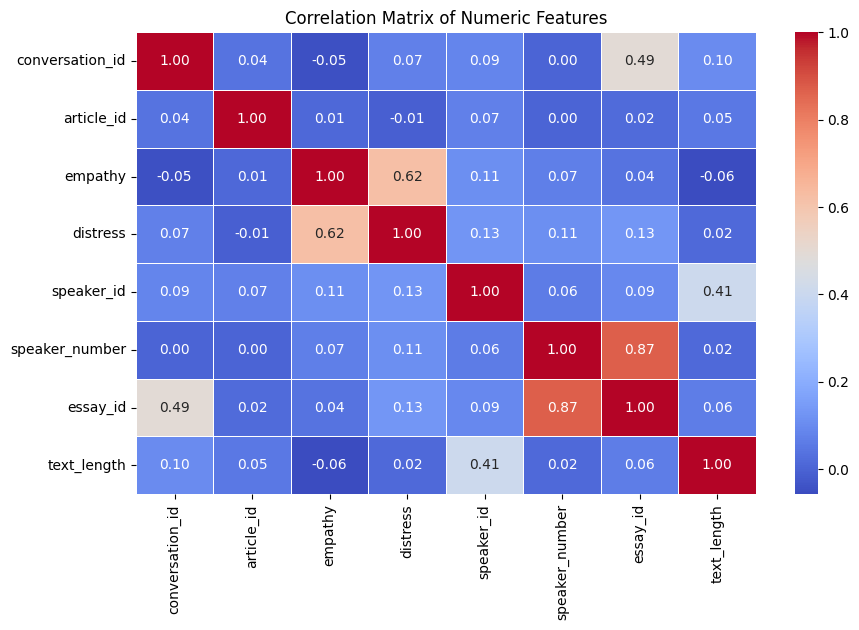

In [76]:

numeric_df = df.select_dtypes(include=["number"])


correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


#Define a function to preprocess text

In [77]:
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)


df["cleaned_essay"] = df["essay"].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Check label distribution

In [79]:
df["emotion_label"] = df["emotion"].apply(lambda x: 1 if x in ["Anger", "Neutral", "Sadness", "Joy", "Hope", "Disgust", "Fear", "Surprise"] else 0)


emotion_counts = df["emotion_label"].value_counts()


print(emotion_counts)


emotion_label
1    636
0    143
Name: count, dtype: int64


# Split dataset into training & testing sets

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_essay"], df["emotion_label"], test_size=0.2, random_state=42)


# Convert text into numerical representation using TF-IDF

In [81]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Logistic Regression model

In [88]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)


lr_pred = lr_model.predict(X_test_tfidf)


print("Logistic Regression Performance:\n", classification_report(y_test, lr_pred))


Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.81      1.00      0.90       127

    accuracy                           0.81       156
   macro avg       0.41      0.50      0.45       156
weighted avg       0.66      0.81      0.73       156



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Confusion Matrix of Logistic Regression

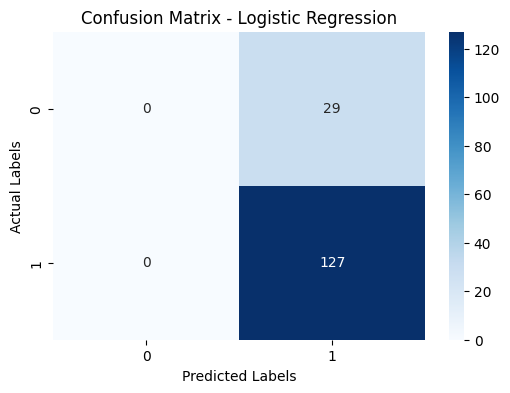

In [92]:
conf_matrix = confusion_matrix(y_test, lr_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Random Forest model

In [87]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)


rf_pred = rf_model.predict(X_test_tfidf)


print("Random Forest Performance:\n", classification_report(y_test, rf_pred))


Random Forest Performance:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.81      1.00      0.90       127

    accuracy                           0.81       156
   macro avg       0.41      0.50      0.45       156
weighted avg       0.66      0.81      0.73       156



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Confusion Matrix of Random Forest

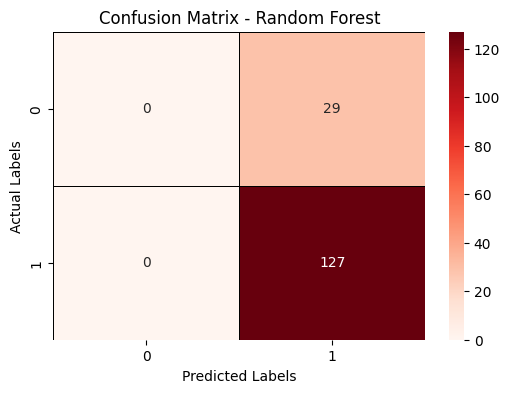

In [93]:
conf_matrix = confusion_matrix(y_test, rf_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5, linecolor='black', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - Random Forest")
plt.show()

#XGBoost Model

In [102]:
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_tfidf, y_train)


xgb_pred = xgb_model.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, xgb_pred)
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.81      0.97      0.88       127

    accuracy                           0.79       156
   macro avg       0.40      0.48      0.44       156
weighted avg       0.66      0.79      0.72       156



# Confusion Matrix of XGBoost Model



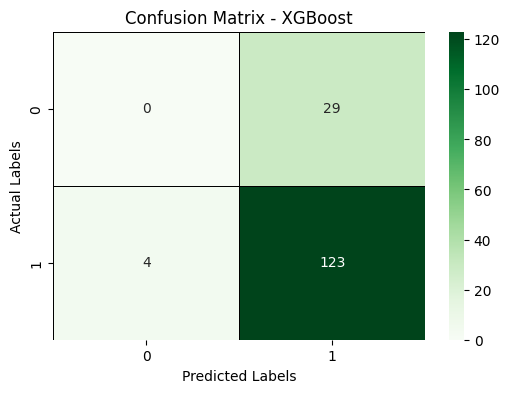

In [94]:
conf_matrix = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', linewidths=0.5, linecolor='black', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - XGBoost")
plt.show()

#Model Comparison

Model Performance Comparison:

                     Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  \
Logistic Regression  0.814103               0.407051            0.500000   
Random Forest        0.814103               0.407051            0.500000   
XGBoost              0.788462               0.404605            0.484252   

                     F1-Score (Macro Avg)  
Logistic Regression              0.448763  
Random Forest                    0.448763  
XGBoost                          0.440860  


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

<Figure size 1000x500 with 0 Axes>

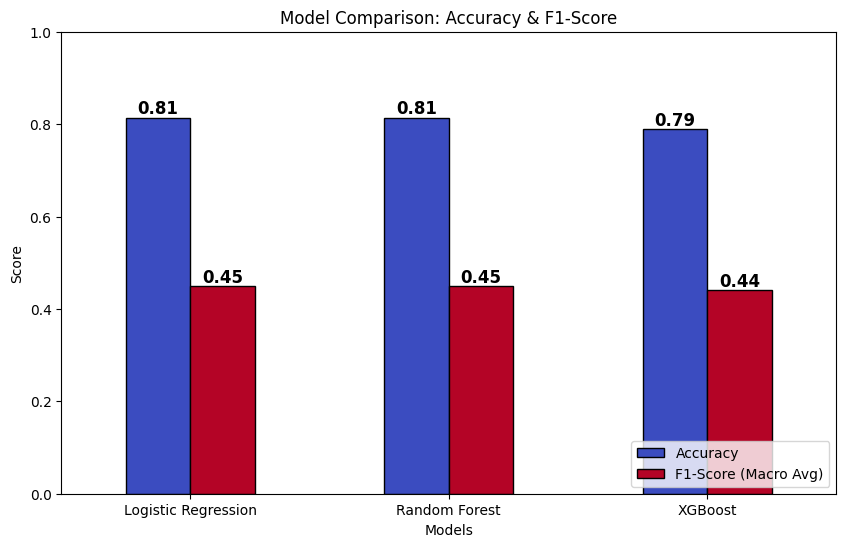

In [97]:

models = {
    "Logistic Regression": lr_pred,
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred
}


model_performance = {}


for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision (Macro Avg)": report["macro avg"]["precision"],
        "Recall (Macro Avg)": report["macro avg"]["recall"],
        "F1-Score (Macro Avg)": report["macro avg"]["f1-score"]
    }


performance_df = pd.DataFrame(model_performance).T


print("Model Performance Comparison:\n")
print(performance_df)


plt.figure(figsize=(10, 5))
ax = performance_df[["Accuracy", "F1-Score (Macro Avg)"]].plot(
    kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black"
)


for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )


plt.title("Model Comparison: Accuracy & F1-Score")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()